# Step1: Install the environment and download data

## Install gym

In [ ]:
!pip install -U gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import necessrary libraries

In [ ]:
import json
import datetime as dt
import pandas as pd
import math
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
from typing import Deque, Dict, List, Tuple

import gym
from gym import spaces

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_

from IPython.display import clear_output

np.set_printoptions(suppress=True)


## Download finacial data

In [ ]:
import yfinance as yf

#start and end date of the data. Can be changed freely.
startDate = "2006-01-01"
endDate = "2022-12-31"

#Load SPY historical data
SPY = yf.download('SPY', start=startDate, end=endDate)
SPY.to_csv('SPY')
SPY= SPY.sort_values('Date')

#load MSFT historical data
MSFT= yf.download('MSFT', start=startDate, end=endDate)
MSFT.to_csv('MSFT')
MSFT= MSFT.sort_values('Date')

#load AMC historical data
AMC= yf.download('AMC', start=startDate, end=endDate)
AMC.to_csv('AMC')
AMC= AMC.sort_values('Date')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Step2: Calculate the profit and show some examples of the financial data

## microsoft (msft, df1)

            Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03   26.250000   27.000000   26.100000   26.840000   19.114637   
1     2006-01-04   26.770000   27.080000   26.770000   26.969999   19.207220   
2     2006-01-05   26.959999   27.129999   26.910000   26.990000   19.221462   
3     2006-01-06   26.889999   27.000000   26.490000   26.910000   19.164482   
4     2006-01-09   26.930000   27.070000   26.760000   26.860001   19.128885   
...          ...         ...         ...         ...         ...         ...   
4274  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
4275  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
4276  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
4277  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
4278  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

         Volume    profit  
0      7997

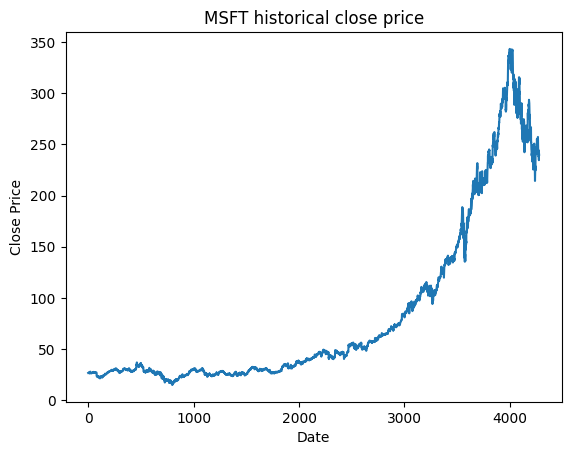

In [ ]:
msft = pd.read_csv('MSFT')
msft = msft.sort_values('Date')

for i in range(len(msft)-1):
    msft.loc[i,"profit"] = msft.loc[i+1,'Close']- msft.loc[i,'Open']
    
plt.plot(msft['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(msft)

#######################the df1 below is just the msft here so I deleted them!!!!!
df1 = msft

## amc (df2)

            Date       Open       High        Low      Close  Adj Close  \
0     2013-12-18  19.180000  19.790001  18.900000  18.900000  13.593410   
1     2013-12-19  18.900000  19.490000  18.809999  19.490000  14.017756   
2     2013-12-20  19.650000  19.770000  19.400000  19.680000  14.154408   
3     2013-12-23  19.790001  19.990000  19.500000  19.740000  14.197564   
4     2013-12-24  19.740000  19.820000  19.500000  19.530001  14.046520   
...          ...        ...        ...        ...        ...        ...   
2270  2022-12-23   4.700000   4.820000   4.310000   4.400000   4.400000   
2271  2022-12-27   4.200000   4.210000   4.000000   4.030000   4.030000   
2272  2022-12-28   4.010000   4.130000   3.810000   3.840000   3.840000   
2273  2022-12-29   3.900000   4.190000   3.860000   4.140000   4.140000   
2274  2022-12-30   4.040000   4.090000   3.900000   4.070000   4.070000   

        Volume    profit  
0      5457200  0.309999  
1      1605400  0.780001  
2       737100  0.

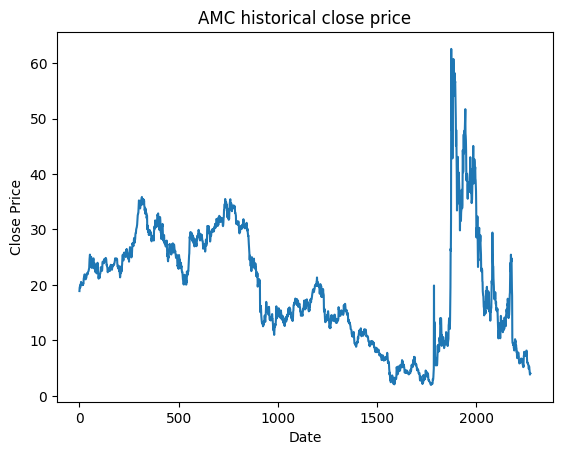

In [ ]:
amc = pd.read_csv('AMC')
amc = amc.sort_values('Date')

for i in range(len(amc)-1):
    amc.loc[i,"profit"] = amc.loc[i+1,'Close']- amc.loc[i,'Open']
    
plt.plot(amc['Close'])
# adding title/year the plot
plt.title('AMC historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(amc)
#######################the df below is just the amc here so I deleted them!!!!!
df2 = amc

## spy (df)

            Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03  125.190002  127.000000  124.389999  126.699997   90.641731   
1     2006-01-04  126.860001  127.489998  126.699997  127.300003   91.070976   
2     2006-01-05  127.150002  127.589996  126.879997  127.379997   91.128151   
3     2006-01-06  128.020004  128.580002  127.360001  128.440002   91.886520   
4     2006-01-09  128.419998  129.059998  128.380005  128.770004   92.122597   
...          ...         ...         ...         ...         ...         ...   
4274  2022-12-23  379.649994  383.059998  378.029999  382.910004  381.454193   
4275  2022-12-27  382.790009  383.149994  379.649994  381.399994  379.949921   
4276  2022-12-28  381.329987  383.390015  376.420013  376.660004  375.227936   
4277  2022-12-29  379.630005  384.350006  379.079987  383.440002  381.982178   
4278  2022-12-30  380.640015  382.579987  378.429993  382.429993  380.975983   

        Volume    profit  
0     732567

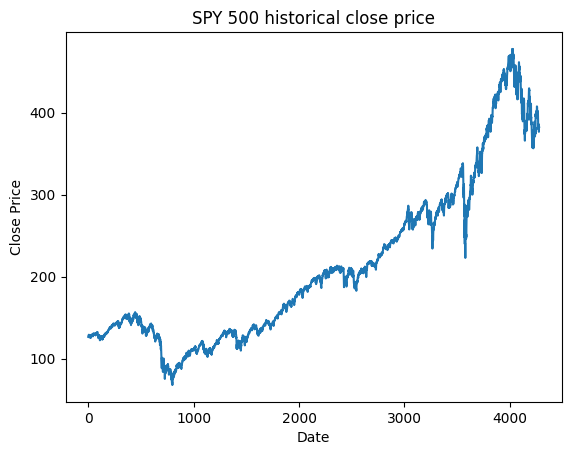

In [ ]:
spy = pd.read_csv('SPY')
spy = spy.sort_values('Date')

for i in range(len(spy)-1):
    spy.loc[i,"profit"] = spy.loc[i+1,'Close']- spy.loc[i,'Open']
    
plt.plot(spy['Close'])
# adding title/year the plot
plt.title('SPY 500 historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(spy)

## again msft.... please delete this 

            Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03   26.250000   27.000000   26.100000   26.840000   19.114637   
1     2006-01-04   26.770000   27.080000   26.770000   26.969999   19.207220   
2     2006-01-05   26.959999   27.129999   26.910000   26.990000   19.221462   
3     2006-01-06   26.889999   27.000000   26.490000   26.910000   19.164482   
4     2006-01-09   26.930000   27.070000   26.760000   26.860001   19.128885   
...          ...         ...         ...         ...         ...         ...   
4274  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
4275  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
4276  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
4277  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
4278  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

         Volume    profit  
0      7997

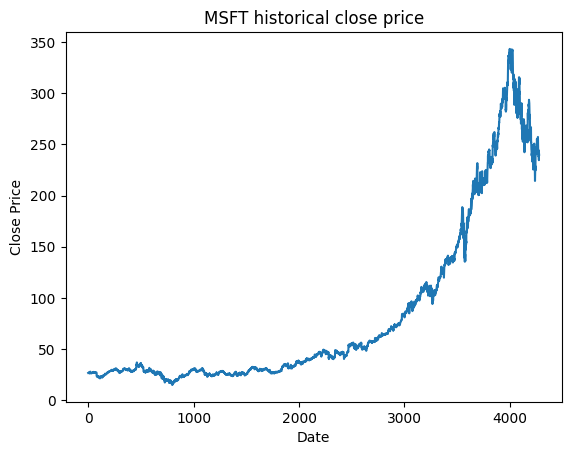

In [ ]:
msft = pd.read_csv('MSFT')
df1 = msft.sort_values('Date')

for i in range(len(msft)-1):
    df1.loc[i,"profit"] = df1.loc[i+1,'Close']- df1.loc[i,'Open']
    
plt.plot(df1['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(df1)

## again amc..... also delete this

            Date       Open       High        Low      Close  Adj Close  \
0     2013-12-18  19.180000  19.790001  18.900000  18.900000  13.593410   
1     2013-12-19  18.900000  19.490000  18.809999  19.490000  14.017756   
2     2013-12-20  19.650000  19.770000  19.400000  19.680000  14.154408   
3     2013-12-23  19.790001  19.990000  19.500000  19.740000  14.197564   
4     2013-12-24  19.740000  19.820000  19.500000  19.530001  14.046520   
...          ...        ...        ...        ...        ...        ...   
2270  2022-12-23   4.700000   4.820000   4.310000   4.400000   4.400000   
2271  2022-12-27   4.200000   4.210000   4.000000   4.030000   4.030000   
2272  2022-12-28   4.010000   4.130000   3.810000   3.840000   3.840000   
2273  2022-12-29   3.900000   4.190000   3.860000   4.140000   4.140000   
2274  2022-12-30   4.040000   4.090000   3.900000   4.070000   4.070000   

        Volume    profit  
0      5457200  0.309999  
1      1605400  0.780001  
2       737100  0.

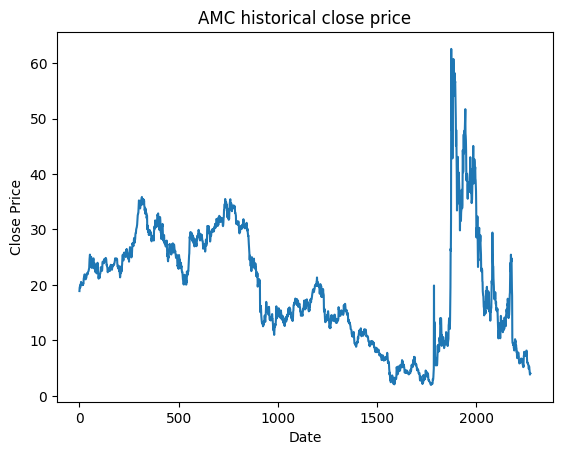

In [ ]:
amc = pd.read_csv('AMC')
df = amc.sort_values('Date')

for i in range(len(df)-1):
    df.loc[i,"profit"] = df.loc[i+1,'Close']- df.loc[i,'Open']
    
plt.plot(df['Close'])
# adding title/year the plot
plt.title('AMC historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(df)

# Step3: Stock trading environment

In [ ]:
MAX_ACCOUNT_BALANCE = 2000000
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 4900
MAX_OPEN_POSITIONS = 5
MAX_STEPS = 2000
INITIAL_ACCOUNT_BALANCE = 10000

class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        self.df = df
        self.reward_range = (0, MAX_ACCOUNT_BALANCE)
# We have 3 actions, corresponding to "buy", "sell", "hold"
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=1, shape=(11,), dtype=np.float16)

    def _next_observation(self):
        obs = np.array([
            self.df.loc[self.current_step, 'Open'] / MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'High'] / MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Low']/ MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Close']/ MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Volume']/ MAX_NUM_SHARES,
            self.balance / MAX_ACCOUNT_BALANCE,
            self.shares_held / MAX_NUM_SHARES,
            self.cost_basis / MAX_SHARE_PRICE,
            self.total_shares_sold / MAX_NUM_SHARES,
            self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE),
            self.profit / MAX_ACCOUNT_BALANCE], dtype=np.float16)
        return obs

    def _take_action(self, action):
        current_price = random.uniform(
            self.df.loc[self.current_step, "Open"], self.df.loc[self.current_step, "Close"])
        action_type = action
        amount = 1

        if action_type < 1:
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible * amount)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price
            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought
        elif action_type < 2:
            shares_sold = int(self.shares_held * amount)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * current_price

        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0

    def step(self, action):
        self._take_action(action)

        self.current_step += 1

        if self.current_step > len(self.df.loc[:, 'Open'].values) - 6:
            self.current_step = 0

        delay_modifier = (self.current_step / MAX_STEPS)

        obs = self._next_observation()
        self.profit = self.net_worth - INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = self.max_net_worth
        done = self.net_worth <= 0.5 * INITIAL_ACCOUNT_BALANCE
        reward = self.profit * delay_modifier

        return obs, reward, done, {}


    def reset(self):
        # Reset the state of the environment to an initial state

        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.profit = 0

       # Set the current step to a random point within the data frame

        self.current_step = random.randint(0, len(self.df.loc[:, 'Open'].values) - 6)
        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen

        profit = self.profit #self.net_worth - INITIAL_ACCOUNT_BALANCE
        max_net_worth= self.max_net_worth
        current_step=self.current_step
        current_balance=self.balance
        shares_held = self.shares_held
        total_shares_sold=self.total_shares_sold
        cost_basis=self.cost_basis
        total_sales_value=self.total_sales_value
        net_worth=self.net_worth
        #print(f'Step: {self.current_step}')
        #print(f'Balance: {self.balance}')
        #print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        #print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        #print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        #print(f'Profit: {profit}')

        episode_output=[profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold]
        return episode_output

# Step4: Replay Buffer

In [ ]:
class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(self, obs_dim: int, size: int, batch_size: int = 32):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ):
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(obs=self.obs_buf[idxs],
                    next_obs=self.next_obs_buf[idxs],
                    acts=self.acts_buf[idxs],
                    rews=self.rews_buf[idxs],
                    done=self.done_buf[idxs])

    def __len__(self) -> int:
        return self.size

# Step5: Define Network classes

## Vanilla network (class DQNNetwork)

In [ ]:
class DQNNetwork(nn.Module):
    def __init__(self, obs_dim: int, action_dim: int):
        """Initialization."""
        super(DQNNetwork, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(obs_dim, 128), 
            nn.ReLU(),
            nn.Linear(128, 128), 
            nn.ReLU(), 
            nn.Linear(128, action_dim)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward method implementation."""
        return self.layers(x)

## Dueling Network (class Network_Dueling)

In [ ]:
class Network_Dueling(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        """Initialization."""
        super(Network_Dueling, self).__init__()
        self.feature_layer = nn.Sequential(nn.Linear(in_dim, 128), nn.ReLU())

        # set advantage layer for dueling
        self.advantage_layer = nn.Sequential(nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, out_dim))

        # set value layer for dueling
        self.value_layer = nn.Sequential(nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 1))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Do forward for q"""
        feature = self.feature_layer(x)

        value = self.value_layer(feature)
        advantage = self.advantage_layer(feature)
        q = value + advantage - advantage.mean(dim=-1, keepdim=True)

        return q


#Step6: Define Agent Classes

## Vanilla Agent (class DQNAgent)

In [ ]:
class DQNAgent:
    """DQN Agent interacting with environment.
    
    Attribute:
        env (gym.Env): openAI Gym environment
        memory (ReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        epsilon (float): parameter for epsilon greedy policy
        epsilon_decay (float): step size to decrease epsilon
        max_epsilon (float): max value of epsilon
        min_epsilon (float): min value of epsilon
        target_update (int): period for target model's hard update
        gamma (float): discount factor
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including
                           state, action, reward, next_state, done
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.99,
    ):
        """Initialization.
        
        Args:
            env (gym.Env): openAI Gym environment
            memory_size (int): length of memory
            batch_size (int): batch size for sampling
            target_update (int): period for target model's hard update
            epsilon_decay (float): step size to decrease epsilon
            lr (float): learning rate
            max_epsilon (float): max value of epsilon
            min_epsilon (float): min value of epsilon
            gamma (float): discount factor
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma
        
        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        #print(self.device)

        # networks: dqn, dqn_target
        self.dqn = DQNNetwork(obs_dim, action_dim).to(self.device)
        self.dqn_target = DQNNetwork(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()
        
        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        # epsilon greedy policy
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]
        
        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, done, _ = self.env.step(action)

        if not self.is_test:
            self.transition += [reward, next_state, done]
            self.memory.store(*self.transition)
    
        return next_state, reward, done

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        samples = self.memory.sample_batch()

        loss = self._compute_dqn_loss(samples)

        self.optimizer.zero_grad()
        loss.backward()
        # DuelingNet: we clip the gradients to have their norm less than or equal to 10.
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()

        return loss.item()
        
    def train(self, num_frames: int, num_episode=100, plotting_interval: int = 200):
        """Train the agent."""
        self.is_test = False
        memory_episode = []
        state = self.env.reset()
        update_cnt = 0
        epsilons = []
        losses = []
        scores = []
        score = 0
        state = self.env.reset()
        for i in range(num_episode):
            update_cnt = 0
            scores = []  # this is collected to show the graph
            score = 0  # Initial reward
            profit=0
            max_net_worth = 0
            current_step = 0
            current_balance = 10000
            shares_held = 0
            total_shares_sold = 0

            for frame_idx in range(1, num_frames + 1):
                action = self.select_action(state)
                next_state, reward, done = self.step(action)

                state = next_state
                score += reward

            # if episode ends
                if done:
                    state = self.env.reset()
                    scores.append(score)
                    print(score)
                    score = 0

            # if training is ready
                if len(self.memory) >= self.batch_size:
                   loss = self.update_model()
                   losses.append(loss)
                   update_cnt += 1
                
                # linearly decrease epsilon
                   self.epsilon = max(
                       self.min_epsilon, self.epsilon - (
                           self.max_epsilon - self.min_epsilon
                       ) * self.epsilon_decay
                   )
                   epsilons.append(self.epsilon)
                
                # if hard update is needed
                   if update_cnt % self.target_update == 0:
                       self._target_hard_update()

            # plotting   sometimes we do not plt
                #if frame_idx % plotting_interval == 0:
                    #self._plot(frame_idx, scores, losses, epsilons)

            episode_output = self.env.render()
            #memory_episode.append(self.env.profit)
            memory_episode.append(episode_output)
            #loss.append(loss)
            losses.append(loss)
            #print(f"Episode {i+1}, loss: {losses:.4f}")
            profit, max_net_worth, current_step, current_balance, shares_held, total_shares_sold,losses,loss

        df_episode_output = pd.DataFrame(memory_episode)
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")

        # df_episode_output.to_csv()
        self.env.close()
        # profit= memory_episode[0]

        return df_episode_output  # added

    def test(self, video_folder: str) -> None:
        """Test the agent."""
        self.is_test = True
        
        # for recording a video
        naive_env = self.env
        self.env = gym.wrappers.RecordVideo(self.env, video_folder=video_folder)
        
        state = self.env.reset()
        done = False
        score = 0
        
        while not done:
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward
        
        print("score: ", score)
        self.env.close()
        
        # reset
        self.env = naive_env

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray]) -> torch.Tensor:
        """Return dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"].reshape(-1, 1)).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        # G_t   = r + gamma * v(s_{t+1})  if state != Terminal
        #       = r                       otherwise
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).max(
            dim=1, keepdim=True
        )[0].detach()
        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss
        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss

    def _target_hard_update(self):
        """Hard update: target <- local."""
        self.dqn_target.load_state_dict(self.dqn.state_dict())
                
    def _plot(
        self, 
        frame_idx: int, 
        scores: List[float], 
        losses: List[float], 
        epsilons: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('epsilons')
        plt.plot(epsilons)
        plt.show()

## Double DQN Agent Class for Double Dueling DQN (class DQNAgent2)

In [ ]:
class DQNAgent2:
    """DQN Agent interacting with environment."""

    def __init__(self, env: gym.Env, memory_size: int, batch_size: int, target_update: int, epsilon_decay: float = 1.0, max_epsilon: float = 1.0, min_epsilon: float = 0.1, gamma: float = 0.99):
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma

        # device: device specification
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        #print(self.device)

        # networks: dqn, dqn_target
        self.dqn = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()

    def policy(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        if not self.is_test:
            self.transition = [state, selected_action]
            self.epsilon = self.epsilon * self.epsilon_decay  # 0.9999 is the constant decay parameter
            if self.epsilon < 0.02:  # this is the minimum threshold of epsilon value
                self.epsilon = self.epsilon

        return selected_action
        # networks: dqn, dqn_target from network
        self.dqn = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()

        # optimizer for nural network
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()

    def update_model(self) -> torch.Tensor:
        """Loss calculation by using gradient descent."""
        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]

        # 1-step Learning loss
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)

        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()

        return loss.item()

    def train(self, num_frames: int, num_episode: int, plotting_interval :int= 200):
     #"""Train the agent."""
        self.is_test = False
        memory_episode = []
        losses = []
        loss = []
        #loss = np.nan
        state = self.env.reset()
        for i in range(num_episode):
            update_cnt = 0
            scores = []  # this is collected to show the graph
            score = 0  # Initial reward
            profit=0
            max_net_worth = 0
            current_step = 0
            current_balance = 10000
            shares_held = 0
            total_shares_sold = 0
            for frame_idx in range(1, num_frames + 1):
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)
                state = next_state

                if done:
                    state = self.env.reset()
                    scores.append(score)
                    score = 0
                # linearly decrease epsilon
                if len(self.memory) >= self.batch_size:
                    loss = self.update_model()
                    losses.append(loss)
                    update_cnt += 1

                    self.epsilon = max(
                       self.min_epsilon, self.epsilon - (
                           self.max_epsilon - self.min_epsilon
                       ) * self.epsilon_decay
                    )
                    memory_episode.append(self.epsilon)

                    if update_cnt % self.target_update == 0:
                        self._target_hard_update()

                 # plotting. we do not plot this here.
                #if frame_idx % plotting_interval == 0:
                     #self._plot(frame_idx, scores, losses, memory_episode)
                   #this makes the average_values in each episode.
            episode_output = self.env.render()
            memory_episode.append(episode_output)
            #loss.append(loss)
            #losses.append(loss)
            #print(f"Episode {i+1}, loss: {losses:.4f}")
            profit, max_net_worth, current_step, current_balance, shares_held, total_shares_sold,losses

        df_episode_output = pd.DataFrame(memory_episode)
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")

        # df_episode_output.to_csv()
        self.env.close()
        # profit= memory_episode[0]

        return df_episode_output  # added

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
    #"""Return DQN loss values"""
    
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).gather(  # Double DQN
        1, self.dqn(next_state).argmax(dim=1, keepdim=True)).detach()

        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

     # calculate dqn loss

        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss

# Q target update is separately executed from q value (estimated value) update.
# Here, this is dueling and DQN

    def _target_hard_update(self):

    # """target update """
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        
    def _plot(
        self, 
        frame_idx: int, 
        scores: List[float], 
        losses: List[float], 
        memory_episode: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('memory_episode')
        plt.plot(memory_episode)
        plt.show()

#Step7: Experiments

## Vannila DQN msft

In [ ]:
env1 = StockTradingEnv(msft)
agent1 = DQNAgent(env1, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent1.train(num_frames=1000, num_episode=100)
performance1 = pd.read_pickle("./dummy.pkl")

env2 = StockTradingEnv(msft)
agent2 = DQNAgent(env2, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent2.train(num_frames=1000, num_episode=100)
performance2 = pd.read_pickle("./dummy.pkl")

env3 = StockTradingEnv(msft)
agent3 = DQNAgent(env3, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent3.train(num_frames=1000, num_episode=100)
performance3 = pd.read_pickle("./dummy.pkl")

performance_vannilamsft = (performance1+performance2+performance3) / 3


-369727.7488421338
19495744.284754936
74662.54451391975
-367781.0836211963


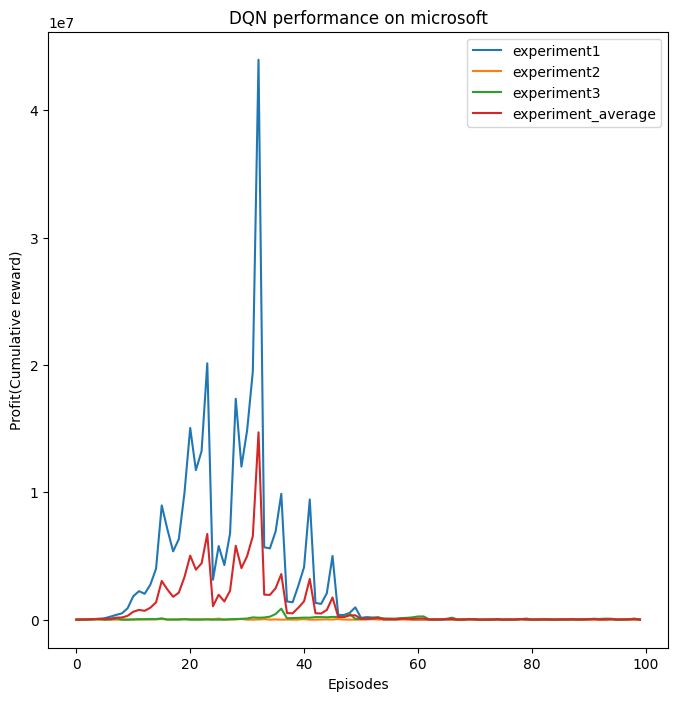

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(performance1[0], label= 'experiment1')
plt.plot(performance2[0], label= 'experiment2')
plt.plot(performance3[0], label= 'experiment3')
plt.plot(performance_vannilamsft[0], label= 'experiment_average')
plt.title('DQN performance on microsoft')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Double Dueling DQN msft

In [ ]:
env4 = StockTradingEnv(msft)
agent4 = DQNAgent2(env4, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent4.train(num_frames=1000, num_episode=100)
performance4 = pd.read_pickle("./dummy.pkl")

env5 = StockTradingEnv(msft)
agent5 = DQNAgent2(env5, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent5.train(num_frames=1000, num_episode=100)
performance5 = pd.read_pickle("./dummy.pkl")

env6 = StockTradingEnv(msft)
agent6 = DQNAgent2(env6, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent6.train(num_frames=1000, num_episode=100)
performance6 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingmsft = (performance4+performance5+performance6) / 3


## Vanilla DQN amc

In [ ]:
env7 = StockTradingEnv(amc)
agent7 = DQNAgent(env7, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent7.train(num_frames=1000, num_episode=100)
performance7 = pd.read_pickle("./dummy.pkl")

env8 = StockTradingEnv(amc)
agent8 = DQNAgent(env8, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent8.train(num_frames=1000, num_episode=100)
performance8 = pd.read_pickle("./dummy.pkl")

env9 = StockTradingEnv(amc)
agent9 = DQNAgent(env9, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent9.train(num_frames=1000, num_episode=100)
performance9 = pd.read_pickle("./dummy.pkl")

performance_vanillaamc = (performance7+performance8+performance9) / 3

-103356.18421328462
-288359.87378009607
-278585.47317385743
-178983.8292677267
-468466.09964857233
-749651.7563723109
-96045.93648305509
-67057.970499512
1819594.3059083612
-947923.6877023592
-57602.17048316639
-151091.71414601422
-88165.35254382202
-431296.6090938235
-517339.82148144103
93622.07695239253
13538561.751130236
-522113.460516251
-24843.770497972688
-105235.01422408815
5010629.95018052
-1427998.148720893
-138583.01100597778
653266.4384602082
-545111.97244183
-54129.730792846494
-172148.60038815247
-81482.5708194381
51705.711882583826
3114.345007658485
-143769.3891330304
-509278.6065716444
-727771.5801461078
-405062.92816678
-727945.6442974022
-404718.7567005566
-35435.110836989246
-229489.89092907452
-932761.6054105513
3728060.0301111233
-188849.27221300133
605010.8019825383
78027.99767526204
414972.8848181442
4527434.130600023
-68138.7417660392
-23209.497496657335
-123576.1108953072
-645301.9230679467
155720.67600346604
-167309.43792170088
-130272.43036845222
-23623.071124

## Double Dueling DQN amc

In [ ]:
env10 = StockTradingEnv(amc)
agent10 = DQNAgent2(env10, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent10.train(num_frames=1000, num_episode=100)
performance10 = pd.read_pickle("./dummy.pkl")

env11 = StockTradingEnv(amc)
agent11 = DQNAgent2(env11, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent11.train(num_frames=1000, num_episode=100)
performance11 = pd.read_pickle("./dummy.pkl")

env12 = StockTradingEnv(amc)
agent12 = DQNAgent2(env12, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent12.train(num_frames=1000, num_episode=100)
performance12 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingamc = (performance10+performance11+performance12) / 3

## Vanilla DQN spy

In [ ]:
env13 = StockTradingEnv(spy)
agent13 = DQNAgent(env13, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent13.train(num_frames=1000, num_episode=100)
performance13 = pd.read_pickle("./dummy.pkl")

env14 = StockTradingEnv(spy)
agent14 = DQNAgent(env14, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent14.train(num_frames=1000, num_episode=100)
performance14 = pd.read_pickle("./dummy.pkl")

env15 = StockTradingEnv(spy)
agent15 = DQNAgent(env15, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent15.train(num_frames=1000, num_episode=100)
performance15 = pd.read_pickle("./dummy.pkl")

performance_vanillaspy = (performance13+performance14+performance15) / 3

1157048.1177409983
2308002.574615104
-248932.53077147363
-265316.3129147449
700290.4936607868
164918.0959147047
-164368.4519246386
5667370.217157848
-137696.7439952733
-170406.9816864472
-536673.5211990483
-338077.8987362823
1036305.8355547534
-410755.12342520553
-289675.07530352625
113128.90075154876
4490233.529713473
-273411.5715512689
2078469.0098356355
92684.48255600895
-401838.4187574538
-262624.0982785913


## Double Dueling DQN spy

In [ ]:
env16 = StockTradingEnv(spy)
agent16 = DQNAgent2(env16, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent16.train(num_frames=1000, num_episode=100)
performance16 = pd.read_pickle("./dummy.pkl")

env17 = StockTradingEnv(spy)
agent17 = DQNAgent2(env17, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent17.train(num_frames=1000, num_episode=100)
performance17 = pd.read_pickle("./dummy.pkl")

env18 = StockTradingEnv(spy)
agent18 = DQNAgent2(env18, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent18.train(num_frames=1000, num_episode=100)
performance18 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingspy = (performance16+performance17+performance18) / 3

## Summary

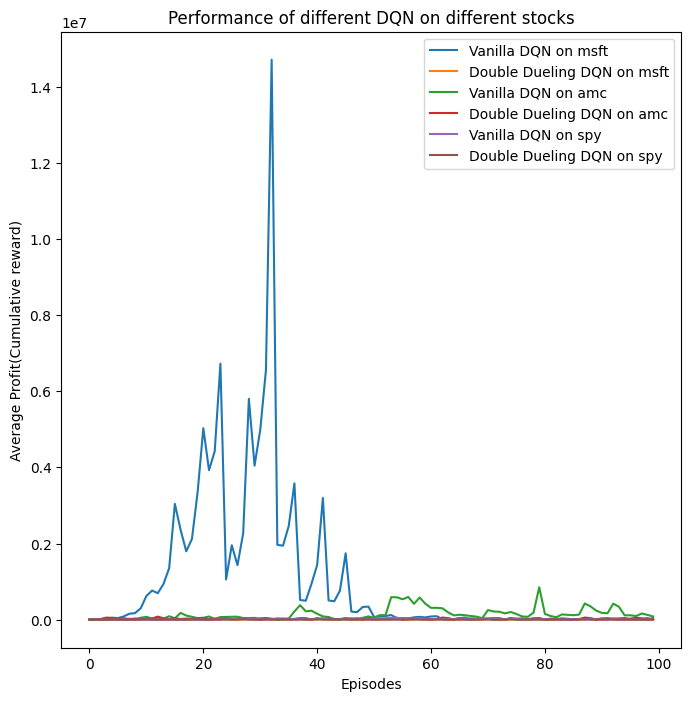

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(performance_vannilamsft[0], label= 'Vanilla DQN on msft')
plt.plot(performance_doubleduelingmsft[0], label= 'Double Dueling DQN on msft')
plt.plot(performance_vanillaamc[0], label= 'Vanilla DQN on amc')
plt.plot(performance_doubleduelingamc[0], label= 'Double Dueling DQN on amc')
plt.plot(performance_vanillaspy[0], label= 'Vanilla DQN on spy')
plt.plot(performance_doubleduelingspy[0], label= 'Double Dueling DQN on spy')

plt.title('Performance of different DQN on different stocks')
plt.xlabel('Episodes')
plt.ylabel('Average Profit(Cumulative reward)')
plt.legend()
plt.show()

# Old Experiments (Please delete the unneeded ones!!!!)

In [ ]:
env = StockTradingEnv(msft)


num_frames = 1000
memory_size = 1000
batch_size = 16
target_update = 100
epsilon_decay = 1/200
num_episode= 100
# train
agent = DoubleDuelingAgent(env, memory_size, batch_size, target_update=target_update, epsilon_decay=epsilon_decay)

profit = agent.train(num_frames, num_episode)

print(profit)
plt.plot(profit)

## Experiment1, test the vanilla DQN on the msft dataset with the following parameters

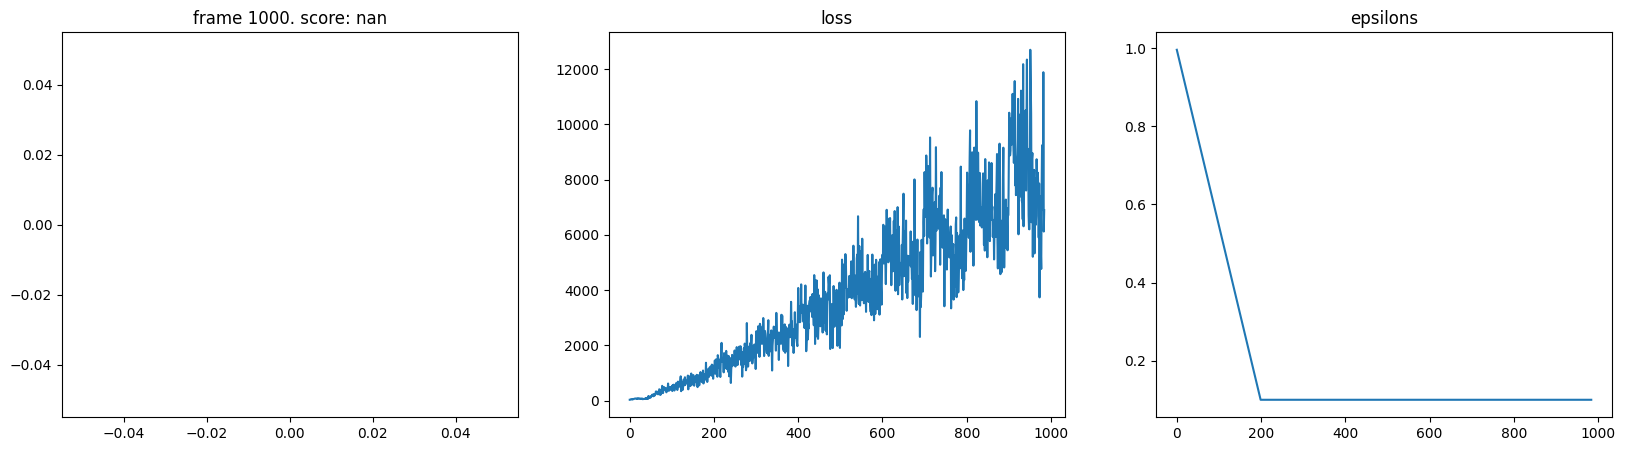

FileNotFoundError: ignored

In [ ]:
env = StockTradingEnv(msft)

# parameters
#num_frames = 1000
#num_episode= 100
#memory_size = 500
#batch_size = 64
#target_update = 200

# parameters
num_frames = 1000
memory_size = 1000
batch_size = 16
target_update = 100
epsilon_decay = 1/200
num_episode= 50
# train
agent = DQNAgent0(env, memory_size, batch_size, target_update=target_update, epsilon_decay=epsilon_decay)
#agent.train(num_frames,num_episode)
result666 = agent.train(num_frames)
#result1 = pd.read_pickle("./dummy.pkl")
#print(result1)
print(result666)

## Experiment2, test the XXX with XXXX

In [ ]:
#df1, microsoft
env = StockTradingEnv(msft)

###############################################
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 16
target_update = 100

# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance1 = pd.read_pickle("./dummy.pkl")
print(Performance1)

KeyboardInterrupt: ignored

## Experiment3, Double agent in the initial code

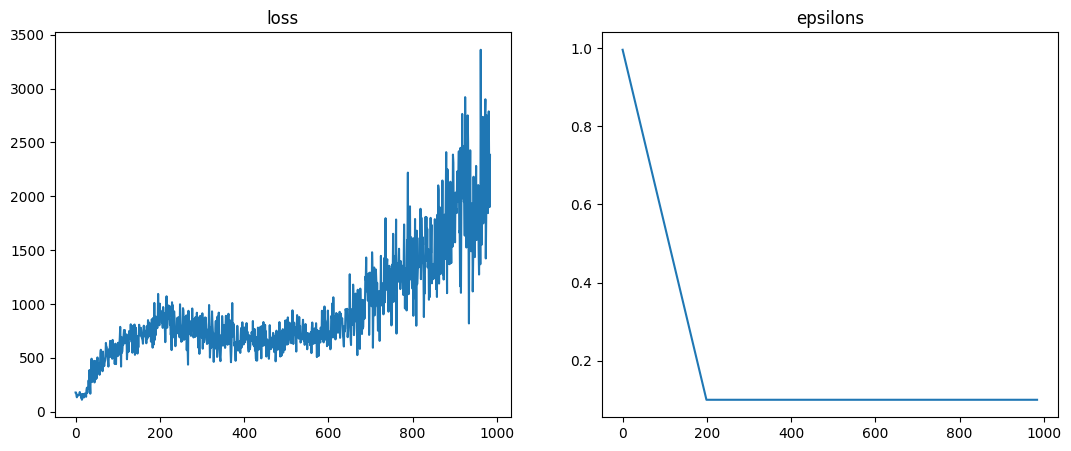

FileNotFoundError: ignored

In [ ]:
#df1, microsoft
env3 = StockTradingEnv(msft)

###############################################
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 16
target_update = 100
epsilon_decay = 1/200
# train
agent = DoubleDuelingAgent(env3, memory_size, batch_size, target_update, epsilon_decay)
agent.train(num_frames,num_episode)
Performance1 = pd.read_pickle("./dummy.pkl")
print(Performance1)

## Some old tests

In [ ]:
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 16
target_update = 100
# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance1 = pd.read_pickle("./dummy.pkl")
print(Performance1)
plt.plot(Performance1[0], label = "experiment1")

cpu
Step: 3857
Balance: 21639.569213972918
Shares held: 0 (Total sold: 16761)
Avg cost for held shares: 0 (Total sales value: 2239151.9272835026)
Net worth: 21639.569213972918 (Max net worth: 22334.148620023687)
Profit: 11639.569213972918
Step: 583
Balance: 21009.62991288266
Shares held: 0 (Total sold: 97685)
Avg cost for held shares: 0 (Total sales value: 5800544.564536547)
Net worth: 21009.62991288266 (Max net worth: 26135.669228595285)
Profit: 11009.629912882661
Step: 1583
Balance: 34263.91851270125
Shares held: 0 (Total sold: 287926)
Avg cost for held shares: 0 (Total sales value: 10676288.546365222)
Net worth: 34263.91851270125 (Max net worth: 36735.079662065036)
Profit: 24263.918512701253
Step: 2583
Balance: 49796.53093467867
Shares held: 0 (Total sold: 444840)
Avg cost for held shares: 0 (Total sales value: 16671431.625906367)
Net worth: 49796.53093467867 (Max net worth: 49796.53093467867)
Profit: 39796.53093467867
Step: 3583
Balance: 95987.45615985488
Shares held: 0 (Total sold

In [ ]:
#DQNAgent2._plot()

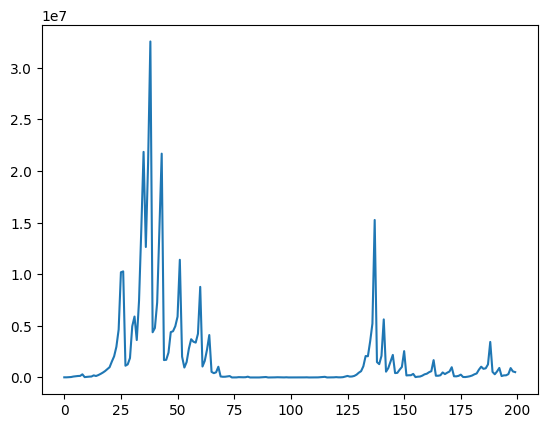

In [ ]:

plt.plot(Performance1[0], label = "experiment1")

In [ ]:
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 32
target_update = 100
#epsilon_decay = 0.999
#gamma=0.5
#train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance2 = pd.read_pickle("./dummy.pkl")
print(Performance2)

cpu
Step: 1478
Balance: 11.744664048645063
Shares held: 299 (Total sold: 49824)
Avg cost for held shares: 26.808269728835892 (Total sales value: 1273695.822593248)
Net worth: 8027.417312970577 (Max net worth: 10921.766519076135)
Profit: -1972.5826870294231
Step: 2478
Balance: 0.1843960900496313
Shares held: 188 (Total sold: 85870)
Avg cost for held shares: 53.912221180171045 (Total sales value: 2550870.3641955056)
Net worth: 10205.674733893173 (Max net worth: 10921.766519076135)
Profit: 205.67473389317274
Step: 3478
Balance: 18411.174003859396
Shares held: 0 (Total sold: 114368)
Avg cost for held shares: 0 (Total sales value: 4916161.248006408)
Net worth: 18411.174003859396 (Max net worth: 19682.77683240666)
Profit: 8411.174003859396
Step: 204
Balance: 19127.73032813149
Shares held: 0 (Total sold: 154469)
Avg cost for held shares: 0 (Total sales value: 8349858.839402221)
Net worth: 19127.73032813149 (Max net worth: 25455.3996303055)
Profit: 9127.730328131489
Step: 1204
Balance: 17.0773

In [ ]:
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 64
target_update = 100
#epsilon_decay = 0.999
#gamma=0.5
#train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance3 = pd.read_pickle("./dummy.pkl")
print(Performance3)

cpu
Step: 681
Balance: 17.250577086288104
Shares held: 322 (Total sold: 44360)
Avg cost for held shares: 26.191065622906514 (Total sales value: 1709543.4553486817)
Net worth: 8392.407174590446 (Max net worth: 11940.650417126913)
Profit: -1607.5928254095543
Step: 1681
Balance: 11330.297813638657
Shares held: 0 (Total sold: 107429)
Avg cost for held shares: 0 (Total sales value: 3336217.469105534)
Net worth: 11330.297813638657 (Max net worth: 11940.650417126913)
Profit: 1330.2978136386573
Step: 2681
Balance: 38.840234800032704
Shares held: 270 (Total sold: 161515)
Avg cost for held shares: 57.89542922651775 (Total sales value: 5534630.875651645)
Net worth: 15667.722559007638 (Max net worth: 17435.84183337687)
Profit: 5667.722559007638
Step: 3681
Balance: 34279.97463496636
Shares held: 0 (Total sold: 197714)
Avg cost for held shares: 0 (Total sales value: 9334778.70231078)
Net worth: 34279.97463496636 (Max net worth: 34321.68669980455)
Profit: 24279.974634966362
Step: 317
Balance: 20.8419

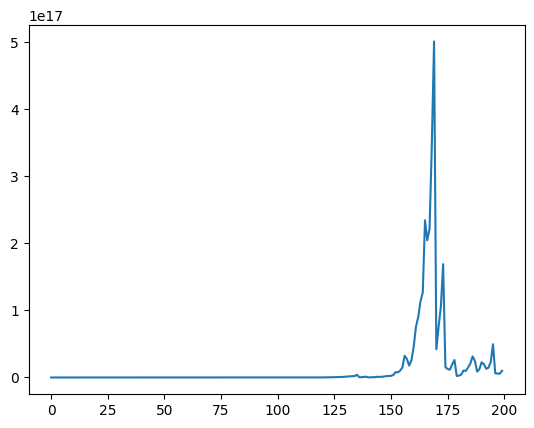

In [ ]:

plt.plot(Performance2[0], label = "experiment1")

## Double-Dueling DQN 

Text(0, 0.5, 'Close Price')

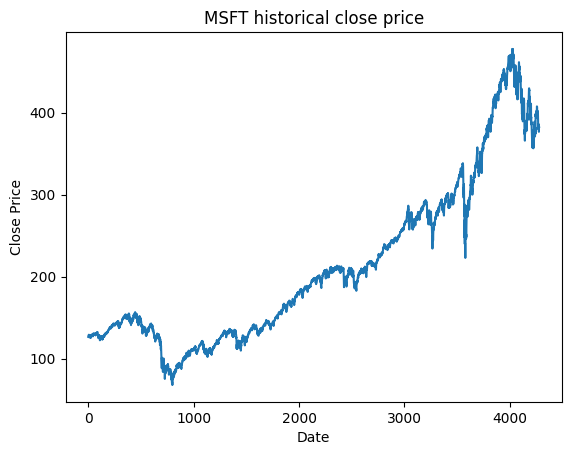

In [ ]:
SPY = pd.read_csv('SPY')
df1 = SPY.sort_values('Date')

for i in range(len(df1)-1):
    df1.loc[i,"profit"] = df1.loc[i+1,'Close']- df1.loc[i,'Open']
    
plt.plot(df1['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
#print(df1)

Text(0, 0.5, 'Close Price')

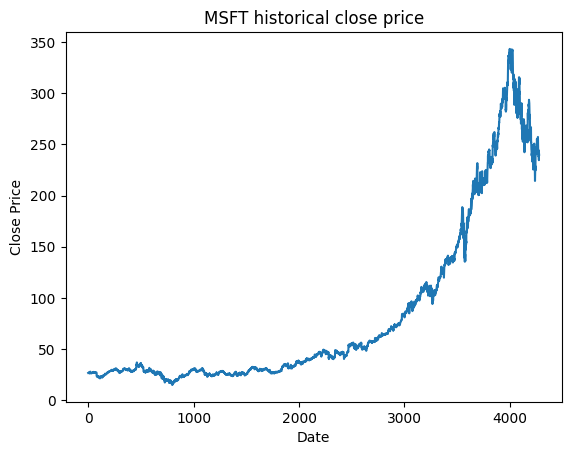

In [ ]:
msft = pd.read_csv('MSFT')
df2 = msft.sort_values('Date')

for i in range(len(df2)-1):
    df2.loc[i,"profit"] = df2.loc[i+1,'Close']- df2.loc[i,'Open']
    
plt.plot(df2['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
#print(df2)

Text(0, 0.5, 'Close Price')

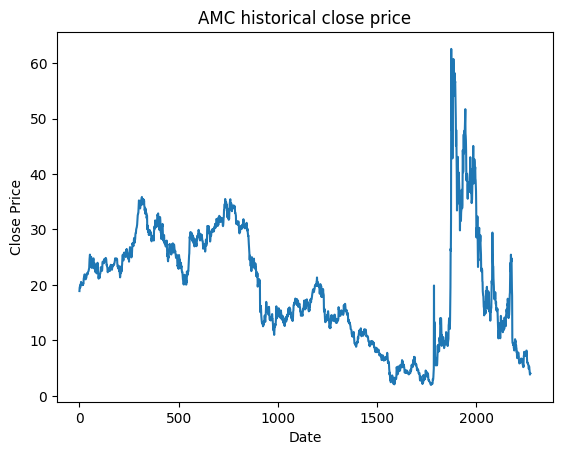

In [ ]:
amc = pd.read_csv('AMC')
df3 = amc.sort_values('Date')

for i in range(len(df3)-1):
    df3.loc[i,"profit"] = df3.loc[i+1,'Close']- df3.loc[i,'Open']
    
plt.plot(df['Close'])
# adding title/year the plot
plt.title('AMC historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
#print(df3)

cpu
Step: 1232
Balance: 26.657215084840573
Shares held: 112 (Total sold: 8770)
Avg cost for held shares: 120.122331952599 (Total sales value: 922089.5381489765)
Net worth: 13448.993137944755 (Max net worth: 14495.025784277032)
Profit: 3448.9931379447553
Step: 2232
Balance: 21829.45789692208
Shares held: 0 (Total sold: 27251)
Avg cost for held shares: 0 (Total sales value: 3752365.4659063406)
Net worth: 21829.45789692208 (Max net worth: 21829.45789692208)
Profit: 11829.457896922078
Step: 3232
Balance: 143.84279241814147
Shares held: 90 (Total sold: 44509)
Avg cost for held shares: 270.6475719134668 (Total sales value: 7725077.915754849)
Net worth: 24748.14974186987 (Max net worth: 26179.59922275293)
Profit: 14748.149741869871
Step: 4232
Balance: 29905.362953950837
Shares held: 0 (Total sold: 57859)
Avg cost for held shares: 0 (Total sales value: 12402726.774067305)
Net worth: 29905.362953950837 (Max net worth: 37110.62427688053)
Profit: 19905.362953950837
Step: 958
Balance: 27.154237558

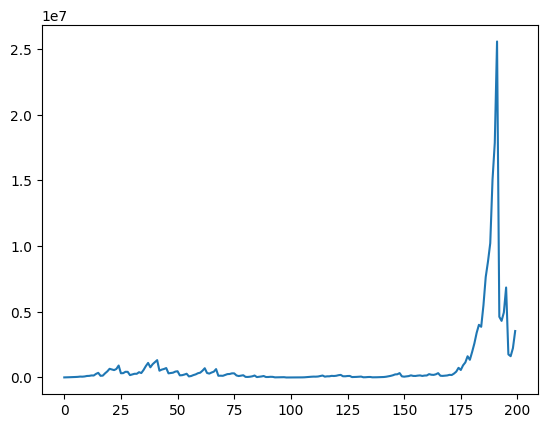

In [ ]:
env = StockTradingEnv(spy)
# parameters
num_frames = 1000
num_episode= 200
memory_size = 400
batch_size = 64
target_update = 100
#epsilon_decay = 0.999
#gamma=0.5
#train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance4 = pd.read_pickle("./dummy.pkl")
print(Performance4)
plt.plot(figsize=(8,8))
plt.plot(Performance4[0])

In [ ]:
env = StockTradingEnv(msft)
# parameters
num_frames = 1000
num_episode= 200
memory_size = 1000
batch_size = 64
target_update = 100
#epsilon_decay = 0.999
#gamma=0.5
#train


agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance5 = pd.read_pickle("./dummy.pkl")
#print(Performance5)

cpu
Step: 818
Balance: 4.403417214943147
Shares held: 370 (Total sold: 39845)
Avg cost for held shares: 19.07270575389736 (Total sales value: 1299679.4682565175)
Net worth: 7166.854453972658 (Max net worth: 10000)
Profit: -2833.145546027342
Step: 1818
Balance: 14.24901753717495
Shares held: 299 (Total sold: 93529)
Avg cost for held shares: 28.16732065864974 (Total sales value: 2734034.8444390073)
Net worth: 8436.277894473447 (Max net worth: 10000)
Profit: -1563.7221055265527
Step: 2818
Balance: 50.18618336637337
Shares held: 242 (Total sold: 136807)
Avg cost for held shares: 65.04691103102499 (Total sales value: 4729364.4579072585)
Net worth: 15646.489021711008 (Max net worth: 15882.638792227182)
Profit: 5646.489021711008
Step: 3818
Balance: 216.54928559484688
Shares held: 99 (Total sold: 166665)
Avg cost for held shares: 232.0285950843876 (Total sales value: 8297003.960303146)
Net worth: 22663.5063163382 (Max net worth: 26768.703309966604)
Profit: 12663.5063163382
Step: 3900
Balance: 

In [ ]:
env = StockTradingEnv(amc)
# parameters
num_frames = 1000
num_episode= 200
memory_size = 200
batch_size = 64
target_update = 100
#epsilon_decay = 0.999
#gamma=0.5
#train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
Performance6 = pd.read_pickle("./dummy.pkl")
#print(Performance6)

cpu
Step: 1249
Balance: 11.374897237228652
Shares held: 709 (Total sold: 13766)
Avg cost for held shares: 13.873857163634348 (Total sales value: 239800.35114571408)
Net worth: 10008.403729596906 (Max net worth: 11325.984827189137)
Profit: 8.403729596906487
Step: 1073
Balance: 7115.881444576932
Shares held: 0 (Total sold: 40963)
Avg cost for held shares: 0 (Total sales value: 954246.9156773626)
Net worth: 7115.881444576932 (Max net worth: 10301.10679028268)
Profit: -2884.118555423068
Step: 2009
Balance: 21.857828011572565
Shares held: 340 (Total sold: 223552)
Avg cost for held shares: 29.86310270592074 (Total sales value: 1258274.251143972)
Net worth: 10786.573868282956 (Max net worth: 40551.79767050597)
Profit: 786.573868282956
Step: 1217
Balance: 18.291420132973144
Shares held: 646 (Total sold: 46036)
Avg cost for held shares: 19.91553658908921 (Total sales value: 868051.998160128)
Net worth: 12883.728056684604 (Max net worth: 14559.15850640991)
Profit: 2883.728056684604
Step: 823
Bal

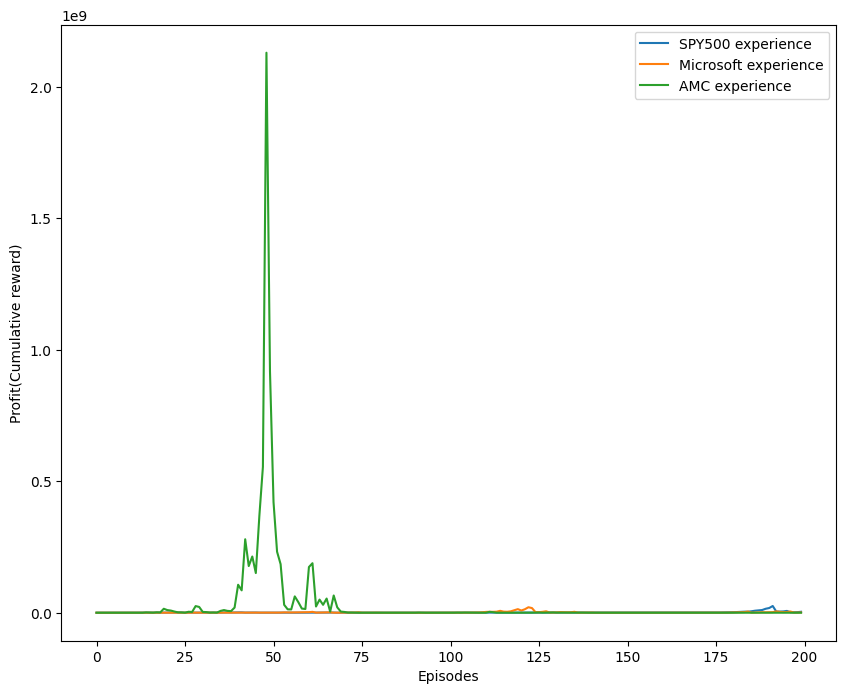

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(Performance4[0], label= 'SPY500 experience')
plt.plot(Performance5[0], label= 'Microsoft experience')
plt.plot(Performance6[0], label= 'AMC experience')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

In [ ]:
# parameters
#num_frames = 1000
#num_episode= 200
#memory_size = 200
#batch_size = 64
#target_update = 100
#epsilon_decay = 0.999
#gamma=0.5

In [ ]:
env = StockTradingEnv(spy)
agent = DQNAgent2(env, memory_size=400, batch_size=32, target_update=100)
agent.train(num_frames=1000,num_episode=500)
Performance7 = pd.read_pickle("./dummy.pkl")
print(Performance7)

cpu
Step: 227
Balance: 13532.433245168531
Shares held: 0 (Total sold: 7307)
Avg cost for held shares: 0 (Total sales value: 1963593.8409113653)
Net worth: 13532.433245168531 (Max net worth: 13644.298018927486)
Profit: 3532.4332451685314
Step: 1227
Balance: 55.76582779266937
Shares held: 122 (Total sold: 27162)
Avg cost for held shares: 119.93796698233646 (Total sales value: 4254246.359686123)
Net worth: 14710.788247752625 (Max net worth: 15720.056751259683)
Profit: 4710.7882477526255
Step: 2227
Balance: 193.17658175999713
Shares held: 78 (Total sold: 43895)
Avg cost for held shares: 201.78607479358857 (Total sales value: 6736370.959290603)
Net worth: 15978.254960464394 (Max net worth: 16618.807781840293)
Profit: 5978.254960464394
Step: 3227
Balance: 13926.748463038744
Shares held: 0 (Total sold: 55307)
Avg cost for held shares: 0 (Total sales value: 9329376.047001597)
Net worth: 13926.748463038744 (Max net worth: 17015.10336010091)
Profit: 3926.7484630387444
Step: 4227
Balance: 72.9739

In [ ]:
env = StockTradingEnv(msft)
agent = DQNAgent2(env, memory_size=400, batch_size=32, target_update=100)
agent.train(num_frames=1000,num_episode=500)
Performance8 = pd.read_pickle("./dummy.pkl")
#print(Performance6)

cpu
Step: 3017
Balance: 20343.021510277
Shares held: 0 (Total sold: 46162)
Avg cost for held shares: 0 (Total sales value: 2419220.932256213)
Net worth: 20343.021510277 (Max net worth: 20343.021510277)
Profit: 10343.021510277002
Step: 4017
Balance: 13.555119410251791
Shares held: 157 (Total sold: 78528)
Avg cost for held shares: 333.36970220142774 (Total sales value: 7739883.995703587)
Net worth: 52352.598365034406 (Max net worth: 54231.847020412664)
Profit: 42352.598365034406
Step: 1824
Balance: 11689.449313211227
Shares held: 0 (Total sold: 39879)
Avg cost for held shares: 0 (Total sales value: 1114457.4991310048)
Net worth: 11689.449313211227 (Max net worth: 12144.562026715907)
Profit: 1689.4493132112275
Step: 2824
Balance: 23.940882067821804
Shares held: 298 (Total sold: 105345)
Avg cost for held shares: 64.89625928589369 (Total sales value: 4111550.306030998)
Net worth: 19287.601196957134 (Max net worth: 22428.153647128318)
Profit: 9287.601196957134
Step: 3824
Balance: 32.23680789

In [ ]:
env = StockTradingEnv(amc)
agent = DQNAgent2(env, memory_size = 400, batch_size= 32, target_update= 100)
agent.train(num_frames=1000,num_episode=500)
Performance9 = pd.read_pickle("./dummy.pkl")
print(Performance9)

cpu
Step: 1159
Balance: 7.498954416991182
Shares held: 449 (Total sold: 62494)
Avg cost for held shares: 15.690162995813566 (Total sales value: 1459851.1554672276)
Net worth: 6914.109722790673 (Max net worth: 12598.537771190697)
Profit: -3085.890277209327
Step: 1042
Balance: 12.424118297280074
Shares held: 712 (Total sold: 12806)
Avg cost for held shares: 13.207580917136204 (Total sales value: 179001.18814647532)
Net worth: 10073.435437292414 (Max net worth: 10685.634074206413)
Profit: 73.43543729241355
Step: 670
Balance: 14523.942736959196
Shares held: 0 (Total sold: 34745)
Avg cost for held shares: 0 (Total sales value: 958100.4382120047)
Net worth: 14523.942736959196 (Max net worth: 14585.560951124246)
Profit: 4523.942736959196
Step: 1189
Balance: 11.420811376301572
Shares held: 557 (Total sold: 6427)
Avg cost for held shares: 19.742879351349863 (Total sales value: 105738.8149442565)
Net worth: 10887.524193905838 (Max net worth: 11008.204610078175)
Profit: 887.5241939058378
Step: 80

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(Performance4[0], label= 'SPY500 experience')
plt.plot(Performance5[0], label= 'Microsoft experience')
plt.plot(Performance6[0], label= 'AMC experience')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

NameError: ignored